In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

TO DO LIST

- veriyi oku (YAPILDI)
- verinin sütunlarını incele
- null değerlerden kurtul
- dtype ı object olanları one hot encode yaparak normal hale getir
- sütunlar arasındaki ilişkileri incele

TEKNİK TO DO LİST

- değerler ölçeklendirilecek, bu şekilde daha iyi bir ilişki inceleme durumuna sahip olurum. (geç)
- minimum nights ı nasıl kullanabilirim (kaggledan bak price gecelik fiyat mı)
- number of reviews yapılacak
- reviews per month yapılacak
- calculated_host_listings_count bakılacak
- avaibility 100 günden yüksek vs gibi bakılacak (bakıyorum)
- number of reviews ı mean le ya da ml kullanıp tahmin ederek dolduracağım. (tahmine gerek yok fillmean de geç çok bi ilişki yok zaten)

In [2]:
sns.set(rc = {"figure.figsize":(6,4)})

In [3]:
df_airbnb = pd.read_csv("airbnb.csv")
df_airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
df_airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [6]:
df_airbnb.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [7]:
df_airbnb = df_airbnb.dropna(subset = "last_review")
# Null values in last review are dropped.

In [9]:
df_airbnb.drop("host_id",axis =1, inplace = True)
df_airbnb.drop("name",axis =1, inplace = True)
df_airbnb.drop("host_name",axis =1, inplace = True)
df_airbnb.drop("id",axis =1, inplace = True)
# unnecessary columns are dropped.

In [10]:
neighbour_hood_unique = df_airbnb["neighbourhood_group"].unique()
neighbour_hood_unique
# We're checking how many different neighbourhood groups are there

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

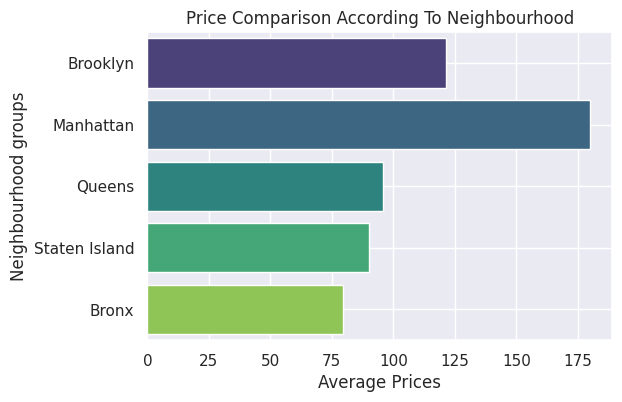

In [11]:
# Lets examine the relationship between the price of the aparts and the neighbourhood group
# lets create a horizontal bar chart to check the relationship

#avg_price_values = []

#for n in neighbour_hood_unique:
#  avg_price_values.append(df_airbnb[df_airbnb["neighbourhood_group"] == n]["price"].mean())

avg_price_values = [df_airbnb[df_airbnb["neighbourhood_group"] == n]["price"].mean() for n in neighbour_hood_unique]
# We're using list comprehension to append the average prices according to the neighbourhood group

sns.barplot(x=avg_price_values, y=neighbour_hood_unique, palette='viridis')
plt.xlabel('Average Prices')
plt.ylabel('Neighbourhood groups')
plt.title('Price Comparison According To Neighbourhood')
plt.grid(True)
plt.show()


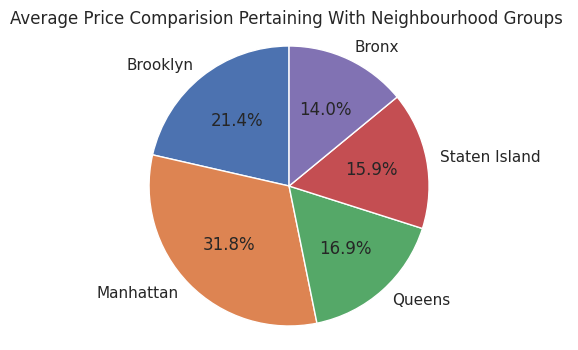

In [12]:
""" Here is an another way to investigate the distribution of avg prices
    according to the neighbourhood group
"""
plt.pie(avg_price_values, labels = neighbour_hood_unique, autopct = "%.1f%%",startangle=90)
plt.axis('equal')

plt.title('Average Price Comparision Pertaining With Neighbourhood Groups ')

plt.show()

# We can clearly say that the average prices in Manhattan is the highest.

In [13]:
room_types = df_airbnb["room_type"].unique()
room_types

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

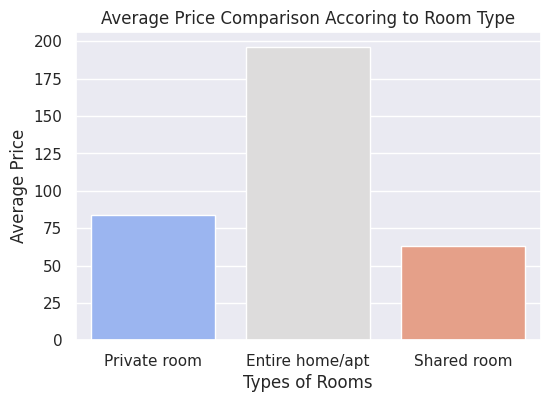

'\n  As expected, the average prices of entire home are much more expensive than\nothers.\n'

In [14]:
# lets investigate the relationship between the type of the rooms and average prices

#average_prices_room = []

#for r in room_types:
#  average_prices_room.append(df_airbnb[ df_airbnb["room_type"] == r]["price"].mean())

average_prices_room = [df_airbnb[ df_airbnb["room_type"] == r]["price"].mean() for r in room_types]

# lets draw a bar chart
sns.barplot(x=room_types, y=average_prices_room, palette = "coolwarm")

plt.xlabel('Types of Rooms')
plt.ylabel('Average Price')
plt.title('Average Price Comparison Accoring to Room Type')

plt.show()

"""
  As expected, the average prices of entire home are much more expensive than
others.
"""

In [15]:
# Now lets check out the distribution of room types to the neighbourhoods
room_type_count_neighbourghood = [df_airbnb[df_airbnb["neighbourhood_group"] == n]["room_type"].value_counts() for n in neighbour_hood_unique]
room_type_count_neighbourghood

[Entire home/apt    8164
 Private room       7993
 Shared room         290
 Name: room_type, dtype: int64,
 Entire home/apt    9967
 Private room       6309
 Shared room         356
 Name: room_type, dtype: int64,
 Private room       2680
 Entire home/apt    1742
 Shared room         152
 Name: room_type, dtype: int64,
 Private room       159
 Entire home/apt    150
 Shared room          5
 Name: room_type, dtype: int64,
 Private room       524
 Entire home/apt    309
 Shared room         43
 Name: room_type, dtype: int64]

In [16]:
# private roomun neighbourhooda göre dağılımı
#room_type_count_neighbourghood[0][0]
private_to_neighbourhood = [r[0] for r in room_type_count_neighbourghood]
entire_to_neighbourhood =  [r[1] for r in room_type_count_neighbourghood]
shared_to_neighbourhood =  [r[2] for r in room_type_count_neighbourghood]

Text(0.5, 1.0, 'The distribution of private flats according to neighbourhood')

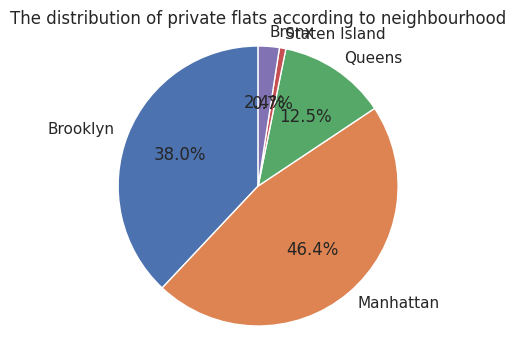

In [17]:
plt.pie(private_to_neighbourhood, labels=neighbour_hood_unique, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Daire şeklinde çizilmesini sağlar
plt.title('The distribution of private flats according to neighbourhood')

Text(0.5, 1.0, 'The distribution of entire apartments according to neighbourhood')

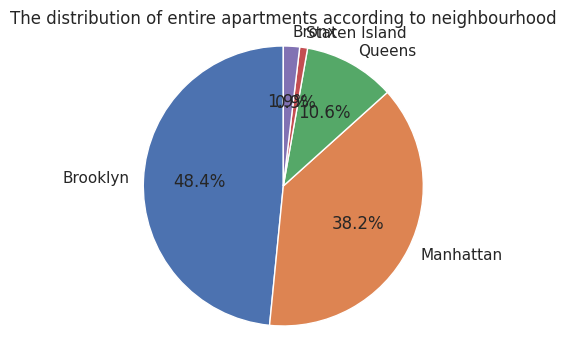

In [18]:
plt.pie(entire_to_neighbourhood, labels=neighbour_hood_unique, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Daire şeklinde çizilmesini sağlar
plt.title('The distribution of entire apartments according to neighbourhood')

Text(0.5, 1.0, 'The distribution of shared flats according to neighbourhood')

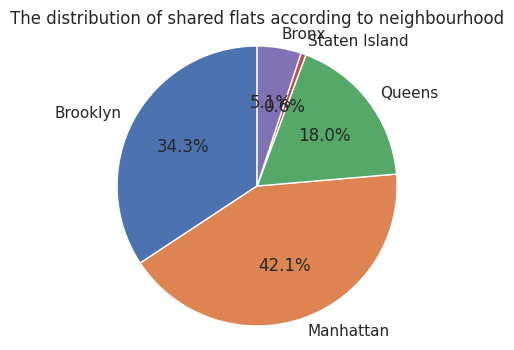

In [19]:
plt.pie(shared_to_neighbourhood, labels=neighbour_hood_unique, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Daire şeklinde çizilmesini sağlar
plt.title('The distribution of shared flats according to neighbourhood')

In [20]:
corr = df_airbnb.corr()["price"]
corr
# latitude sütunundaki değerlerin dağılımını çizip doğu batı diye ayırsam
# longitutde u da kuzey güney diye ayırsam
# batıdan daha çok ev alınıyo tarzı bir yol deneyebilirim.
# latitude değerlerini histogram çiz bak dağılımına

<ipython-input-20-65105afc6f79>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_airbnb.corr()["price"]


latitude                          0.031318
longitude                        -0.155361
price                             1.000000
minimum_nights                    0.025506
number_of_reviews                -0.035938
reviews_per_month                -0.030608
calculated_host_listings_count    0.052903
availability_365                  0.078234
Name: price, dtype: float64

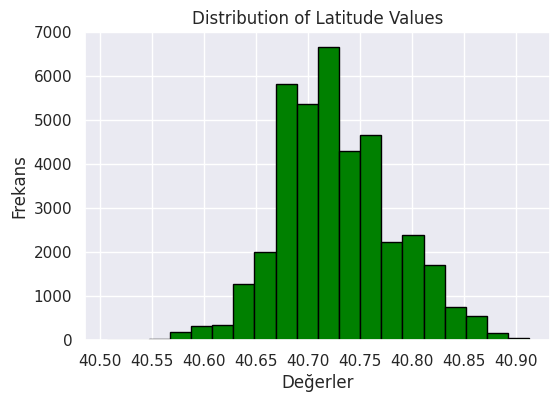

In [21]:
plt.hist(df_airbnb["latitude"], bins = 20, edgecolor="black",color="green")
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution of Latitude Values')
plt.grid(True)
plt.show()

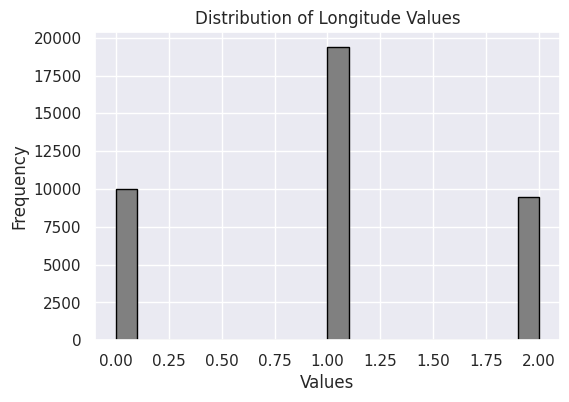

In [45]:
plt.hist(df_airbnb["longitude"], bins = 20, edgecolor="black",color = "gray")
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution of Longitude Values')
plt.grid(True)
plt.show()

In [26]:
first_iq_lat = 40.690100
third_iq_lat = 40.763115
lat_max = 40.913060

first_iq_long = -73.983070
third_iq_long = -73.936275
long_max = -73.712990

# Those values are got from their interquantile ranges.

def assign_latitude_region(latitude):
  if 0 <= latitude < first_iq_lat:
    return "West"
  elif first_iq_lat <= latitude < third_iq_lat:
    return "Central"
  elif third_iq_lat <= latitude <= lat_max:
    return "East"


def assign_longitude_region(longitude):
  if -75 <= longitude < first_iq_long:
    return "South"
  elif first_iq_long <= longitude < third_iq_long:
    return "Central"
  elif third_iq_long <= longitude <= long_max:
    return "North"


In [27]:
df_airbnb["latitude"] = df_airbnb["latitude"].apply(assign_latitude_region)
df_airbnb["longitude"] = df_airbnb["longitude"].apply(assign_longitude_region)

In [29]:
pivot_table = pd.pivot_table(df_airbnb, values='price', index='latitude', columns='longitude', aggfunc='mean')

In [30]:
pivot_table

longitude,Central,North,South
latitude,,,
Central,157.008840,88.002540,215.344516
East,142.154060,94.589047,186.453515
West,119.246122,102.720678,128.258048


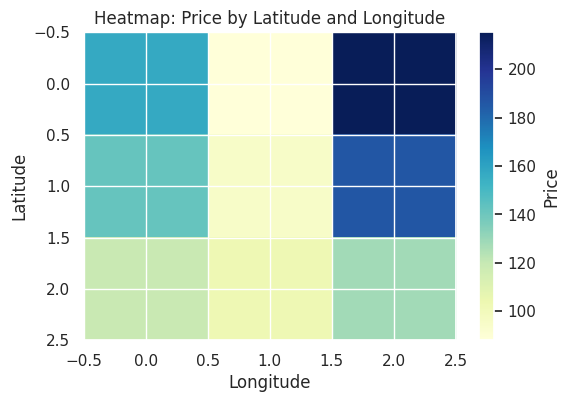

In [35]:
plt.imshow(pivot_table, cmap='YlGnBu', interpolation='nearest', aspect='auto')

plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.title('Heatmap: Price by Latitude and Longitude')

plt.colorbar(label='Price')

plt.show()

# As you can see the north east part is more expensive in general.

In [70]:
neighbourhood_value_counts = df_airbnb["neighbourhood"].value_counts()
neighbourhood_value_counts

Others                21215
Williamsburg           3163
Bedford-Stuyvesant     3141
Harlem                 2206
Bushwick               1944
Hell's Kitchen         1532
East Village           1490
Upper West Side        1482
Upper East Side        1405
Crown Heights          1265
Name: neighbourhood, dtype: int64

In [54]:
small_values = neighbourhood_value_counts[neighbourhood_value_counts < 1000]

filter_condition = df_airbnb['neighbourhood'].isin(small_values.index)

# We're changing the values whose value count is less than 1000 as "Others".

df_airbnb.loc[filter_condition, 'neighbourhood'] = 'Others'

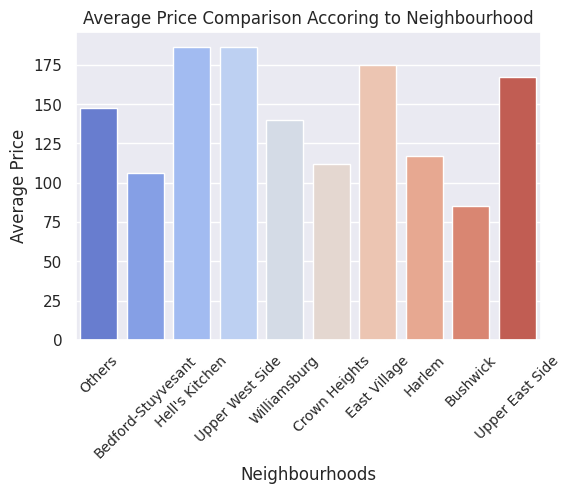

In [69]:
# lets examine the relationship between neighbourhood and average prices

neighbourhood_cols =  df_airbnb["neighbourhood"].unique()
avg_neighbourhood_price = [df_airbnb[df_airbnb["neighbourhood"] ==  n]["price"].mean() for n in neighbourhood_cols]

sns.barplot(x=neighbourhood_cols, y=avg_neighbourhood_price, palette = "coolwarm")

plt.xlabel('Neighbourhoods')
plt.ylabel('Average Price')
plt.title('Average Price Comparison Accoring to Neighbourhood')

plt.xticks(fontsize=10, rotation = 45) # rotation parameter enables us to rotate the words in x axis such that the words won't collapse

plt.show()

"""
  According to the bar graph, Hell's Kitchen and Bedford Stuyvesant are the most expensive neighbourhoods. More detailed investigation can be made
  with checking the room types in those area. Hence, the most expensive neighbourhood can be found.
"""

In [77]:
df_airbnb.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Others,0,1,Private room,149,1,9,2018-10-19,0.21,6,365
1,Manhattan,Others,1,2,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,Brooklyn,Others,0,1,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Manhattan,Others,2,1,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,Manhattan,Others,1,1,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [75]:
df_airbnb["minimum_nights"]

0         1
1         1
3         1
4        10
5         3
         ..
48782     1
48790     1
48799     1
48805     1
48852     1
Name: minimum_nights, Length: 38843, dtype: int64

In [74]:

"""
  We're checking the correlation between number of reviews and the price such that we can determine whether filling values
 with mean or using a ml appraoch to fill those values.
"""
df_airbnb_copy = df_airbnb.copy()
df_airbnb_copy.dropna(subset ="number_of_reviews",inplace = True)


df_airbnb.corr()["price"]["number_of_reviews"]

# Number of reviews is not highly correlated with price so we can fill the null values with mean.

<ipython-input-74-292265f2c6d0>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_airbnb.corr()["price"]["number_of_reviews"]


-0.03593814824481368

In [89]:
df_airbnb["availability_365"].describe()

# I will classify those values such as at least two months or six months such that we can find more meaningful outcome

count    38843.000000
mean       114.882888
std        129.543636
min          0.000000
25%          0.000000
50%         55.000000
75%        229.000000
max        365.000000
Name: availability_365, dtype: float64

In [98]:
def categorize_availability(availability):

  cond_1 = df_airbnb[df_airbnb["availability_365"] < 60]
  cond_2 = df_airbnb[df_airbnb["availability_365"] >= 60]  and df_airbnb[df_airbnb["availability_365"] < 180]
  cond_3 = df_airbnb[df_airbnb["availability_365"] >= 180]

  if df_airbnb[cond_1]:
    return "Less than 2 months"
  elif df_airbnb[cond_2]:
    return "2-6 months"
  elif df_airbnb[cond_3]:
    return "More than 6 months"

In [99]:
df_airbnb["availability_365"] = df_airbnb["availability_365"].apply(categorize_availability)

ValueError: ignored

In [96]:
df_airbnb["availability_365"].isna().sum()

0